In [1]:
import theano
import keras

from keras import backend as k
from keras.models import Sequential
from keras.layers import Layer
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Flatten
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
import itertools
import numpy as np
import pandas as pd
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.


In [2]:
train_path = "/home/v-nitin.gupta/Desktop/Nitin Machine learning & Deep learning/Data for deep learning/Image data /Cat and dog images/training_set/"

test_path = "/home/v-nitin.gupta/Desktop/Nitin Machine learning & Deep learning/Data for deep learning/Image data /Cat and dog images/test_set/"

validation_path = "/home/v-nitin.gupta/Desktop/Nitin Machine learning & Deep learning/Data for deep learning/Image data /Cat and dog images/validation_set/"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=["cats","dogs"],batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=["cats","dogs"],batch_size=10)

validation_batches = ImageDataGenerator().flow_from_directory(validation_path,target_size=(224,224),classes=["cats","dogs"],batch_size=10)

Found 7655 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
image,lables = next(train_batches)

/home/v-nitin.gupta/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


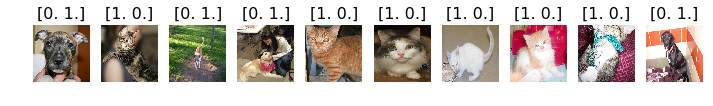

In [6]:
plots(image,titles=lables)

In [7]:
model = Sequential([
    Conv2D(32,(3,3,),activation ="relu",input_shape = (224,224,3)),
    Flatten(),
    Dense(2,activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(Adam(0.001),loss = categorical_crossentropy,metrics=["accuracy"])

In [9]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=validation_batches,validation_steps= 4,epochs=10,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 3s - loss: 8.4620 - acc: 0.4750 - val_loss: 7.2541 - val_acc: 0.5500
Epoch 2/10
 - 2s - loss: 6.0443 - acc: 0.6250 - val_loss: 6.8502 - val_acc: 0.5750
Epoch 3/10
 - 2s - loss: 8.4620 - acc: 0.4750 - val_loss: 8.4624 - val_acc: 0.4750
Epoch 4/10
 - 2s - loss: 5.2384 - acc: 0.6750 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 2s - loss: 8.4620 - acc: 0.4750 - val_loss: 6.8502 - val_acc: 0.5750
Epoch 6/10
 - 2s - loss: 7.6561 - acc: 0.5250 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 7/10
 - 2s - loss: 5.6413 - acc: 0.6500 - val_loss: 8.8650 - val_acc: 0.4500
Epoch 8/10
 - 2s - loss: 5.2384 - acc: 0.6750 - val_loss: 10.0738 - val_acc: 0.3750
Epoch 9/10
 - 2s - loss: 9.6709 - acc: 0.4000 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 10/10
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.8650 - val_acc: 0.4500


In [10]:
test_images,test_lables = next(test_batches)

In [11]:
print(test_lables)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [12]:
test_lables = test_lables[:,0]
print(test_lables)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
prediction = model.predict_generator(test_batches,steps=1,verbose=0)

In [14]:
prediction

array([[1.0000000e+00, 3.1536334e-31],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3083107e-32],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.1309247e-11],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.8902640e-33]], dtype=float32)

In [15]:
cm = confusion_matrix(test_lables,prediction[:,0])

In [16]:
cm_plot_lables = ["CAT","DOGS"]

# Bulid Fine-tuned vgg16 Model

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
type(vgg16_model)

keras.engine.training.Model

In [20]:
#vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
    model.add(layer)


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [22]:
for layer in model.layers:
    layer.trainable = False


In [23]:
model.add(Dense(2, activation='softmax'))


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [25]:
model.compile(Adam(0.001),loss = categorical_crossentropy,metrics=["accuracy"])

In [26]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=validation_batches,validation_steps= 4,epochs=20,verbose=2)

Epoch 1/20
 - 40s - loss: 0.8723 - acc: 0.7000 - val_loss: 0.4496 - val_acc: 0.8500
Epoch 2/20
 - 40s - loss: 0.1808 - acc: 0.9250 - val_loss: 0.2453 - val_acc: 0.9250
Epoch 3/20
 - 40s - loss: 0.6462 - acc: 0.8250 - val_loss: 0.1862 - val_acc: 0.9500
Epoch 4/20
 - 40s - loss: 0.2391 - acc: 0.9500 - val_loss: 0.4773 - val_acc: 0.8500
Epoch 5/20
 - 40s - loss: 0.4643 - acc: 0.8500 - val_loss: 0.4281 - val_acc: 0.8750
Epoch 6/20
 - 39s - loss: 0.1005 - acc: 0.9500 - val_loss: 0.1858 - val_acc: 0.9000
Epoch 7/20
 - 40s - loss: 0.0965 - acc: 0.9500 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 8/20
 - 40s - loss: 0.1580 - acc: 0.9250 - val_loss: 0.0702 - val_acc: 0.9500
Epoch 9/20
 - 40s - loss: 0.3757 - acc: 0.8750 - val_loss: 0.1814 - val_acc: 0.8500
Epoch 10/20
 - 40s - loss: 0.1995 - acc: 0.9250 - val_loss: 0.0906 - val_acc: 0.9250
Epoch 11/20
 - 40s - loss: 0.2259 - acc: 0.9250 - val_loss: 0.0554 - val_acc: 0.9750
Epoch 12/20
 - 40s - loss: 0.0196 - acc: 0.9750 - val_loss: 0.0731 - val_a

# Predict using Fine Tune Vgg16 Model

In [27]:
test_image,test_lables = next(test_batches)

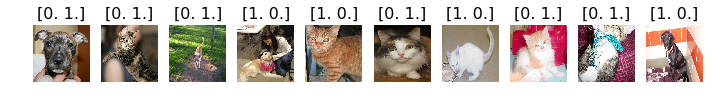

In [28]:
plots(image,titles=test_lables)

In [29]:
test_lables = test_lables[:,0]
print(test_lables)

[0. 0. 0. 1. 1. 0. 1. 0. 0. 1.]


In [30]:
prediction = model.predict_generator(test_batches,steps=1,verbose=0)

In [31]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [32]:
cm = confusion_matrix(test_lables,np.round(prediction[:,0]))

[[2 4]
 [2 2]]


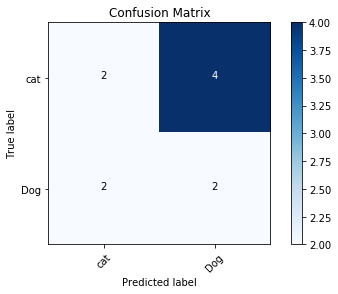

In [33]:
cm_plot_lables=["cat","Dog"]
plot_confusion_matrix(cm,cm_plot_lables,title = 'Confusion Matrix')